In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from us_states_abbrev import *

In [2]:
covid_path = "data/covid/us_states_covid19_daily.csv"
traffic_path = "data/traffic/US_Accidents_June20.csv"

covid_data = pd.read_csv(covid_path, usecols=['date', 'state', 'positive', 'negative', 'totalTestResults', 'hospitalizedCurrently', 'hospitalizedCumulative', 'death'])
traffic_data = pd.read_csv(traffic_path, usecols=['Start_Time', 'State'])
traffic_data = traffic_data.rename(columns={'State': 'state'})

In [3]:
#Convert state 2-letter code to full name
covid_data['state'] = covid_data['state'].map(abbrev_us_state)
traffic_data['state'] = traffic_data['state'].map(abbrev_us_state)

In [4]:
covid_unique = covid_data['state'].unique()
traffic_unique = traffic_data['state'].unique()


In [5]:
#Discovers the states that are included in the Covid dataset but not the traffic dataset
contains = False
difference = []
for covid_state in covid_unique:
    for traffic_state in traffic_unique:
        if covid_state == traffic_state:
            contains = True
    if(contains == False):
        difference.append(covid_state)
    contains = False



In [6]:
# Convert date column to datetime object
covid_data['date'] = pd.to_datetime(covid_data['date'], format='%Y%m%d')
traffic_data['date'] = pd.to_datetime(traffic_data['Start_Time'], format='%Y-%m-%d %H:%M:%S').dt.date

# Remove Start_Time column from traffic_data
traffic_data = traffic_data[['date', 'state']]

In [7]:
import datetime
# def plot_covid_state(state):

state = "New York"

# Extract the covid data for the given state
state_covid_data = covid_data.loc[covid_data['state'] == state]

# Extract the traffic data for the given state
state_traffic_data = traffic_data.loc[traffic_data['state'] == state]




In [8]:
# Merge rows with same date and add a counter column
# TODO: Make sure this is done correctly
state_traffic_data['count'] = state_traffic_data.groupby(['date'])['date'].transform('size')
state_traffic_data.drop_duplicates(keep='first', inplace=True)
state_traffic_data = state_traffic_data.sort_values(by='date')



In [9]:
count = state_traffic_data['count']
count = count.rolling(window = 14).mean()
state_traffic_data['count'] = count

In [10]:
# Remove rows before and after the start and end date
start_date = pd.to_datetime('2020-01-01', format='%Y-%m-%d', errors='ignore')
end_date = pd.to_datetime('2021-01-01', format='%Y-%m-%d', errors='ignore')
mask = (state_traffic_data['date'] > start_date) & (state_traffic_data['date'] <= end_date)
state_traffic_data = state_traffic_data.loc[mask]



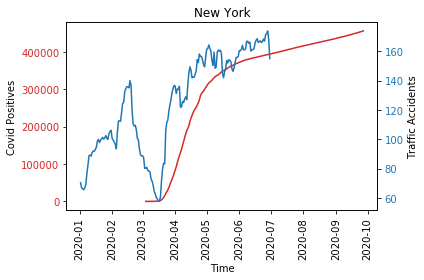

In [11]:
fig, ax1 = plt.subplots()

plt.xticks(rotation = 90)

# Plot covid cases
dates_covid = state_covid_data['date']
positives = state_covid_data['positive']

color = 'tab:red'
ax1.set_xlabel('Time')
ax1.set_ylabel('Covid Positives')
ax1.plot(dates_covid, positives, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx() # Instantiate a second axes that shares the same x-axis

# Plot traffic accidents
dates_traffic = state_traffic_data['date']
accidents = state_traffic_data['count']

color = 'tab:blue'
ax2.set_ylabel('Traffic Accidents')
ax2.plot(dates_traffic, accidents, color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Show figure
plt.title(state)
fig.tight_layout()
plt.show()

In [12]:
# plot_covid_state('California')
